# Fresnal Curves Analysis

## Preliminary Setup

Run all blocks in this section.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as opt

# import time
import pathlib as pl
from analysis import *

# import qexpy as q
# import qexpy.plotting as qplt

### Config

In [6]:
# Set to the filename containing data.  
scan_name = "2022august18/baby_interferometer_centre_fresnal_curves_1749.csv"

#########################
# Plot Generator Config #
#########################

# Sets name of sample on plots
sample_name = "Baby Interferometer"
# Sets filename to save, relevant only if save_figures = True
folder_name = "baby-interferometer"
# Saves the plot to file if True
save_figures = True
# Sets the size of the figures. Accepts tuples in the form (x, y).
figure_size = (7, 4)

# Creates Folder if does not yet exist
pl.Path("figures/{}/fresnal-curve".format(folder_name)).mkdir(parents=True, exist_ok=True)

## Read Power Meter Measurements

In [7]:
scan_df = pd.read_csv(
    scan_name,
    usecols=[
        "Power - Mean [W]",
        "Power - Std. [W]",
        "G3 Y Rotation",
        "G3 X Rotation",
        "Polarizer [deg]",
        "Analyzer [deg]",
    ],
)

x_rot_values = np.unique(scan_df["G3 X Rotation"])
y_rot_values = np.unique(scan_df["G3 Y Rotation"])
analyzer_angle = np.unique(scan_df["Analyzer [deg]"])
polarizer_angle = 90


power = {}

for angle in analyzer_angle:

    for x_rot in x_rot_values:

        key = (angle, x_rot)

        power[key] = []

        for y_rot in y_rot_values:

            power[key].append(
                get_measurements(
                    scan_df,
                    "Power - Mean [W]",
                    {
                        "Polarizer [deg]": polarizer_angle,
                        "Analyzer [deg]": angle,
                        "G3 X Rotation": x_rot,
                        "G3 Y Rotation": y_rot,
                    },
                    tolerance=10,
                )
            )

## Plot Generator

### Combined Fresnal Plot Generator

**Do not** modify the section below unless you know what you are doing. 

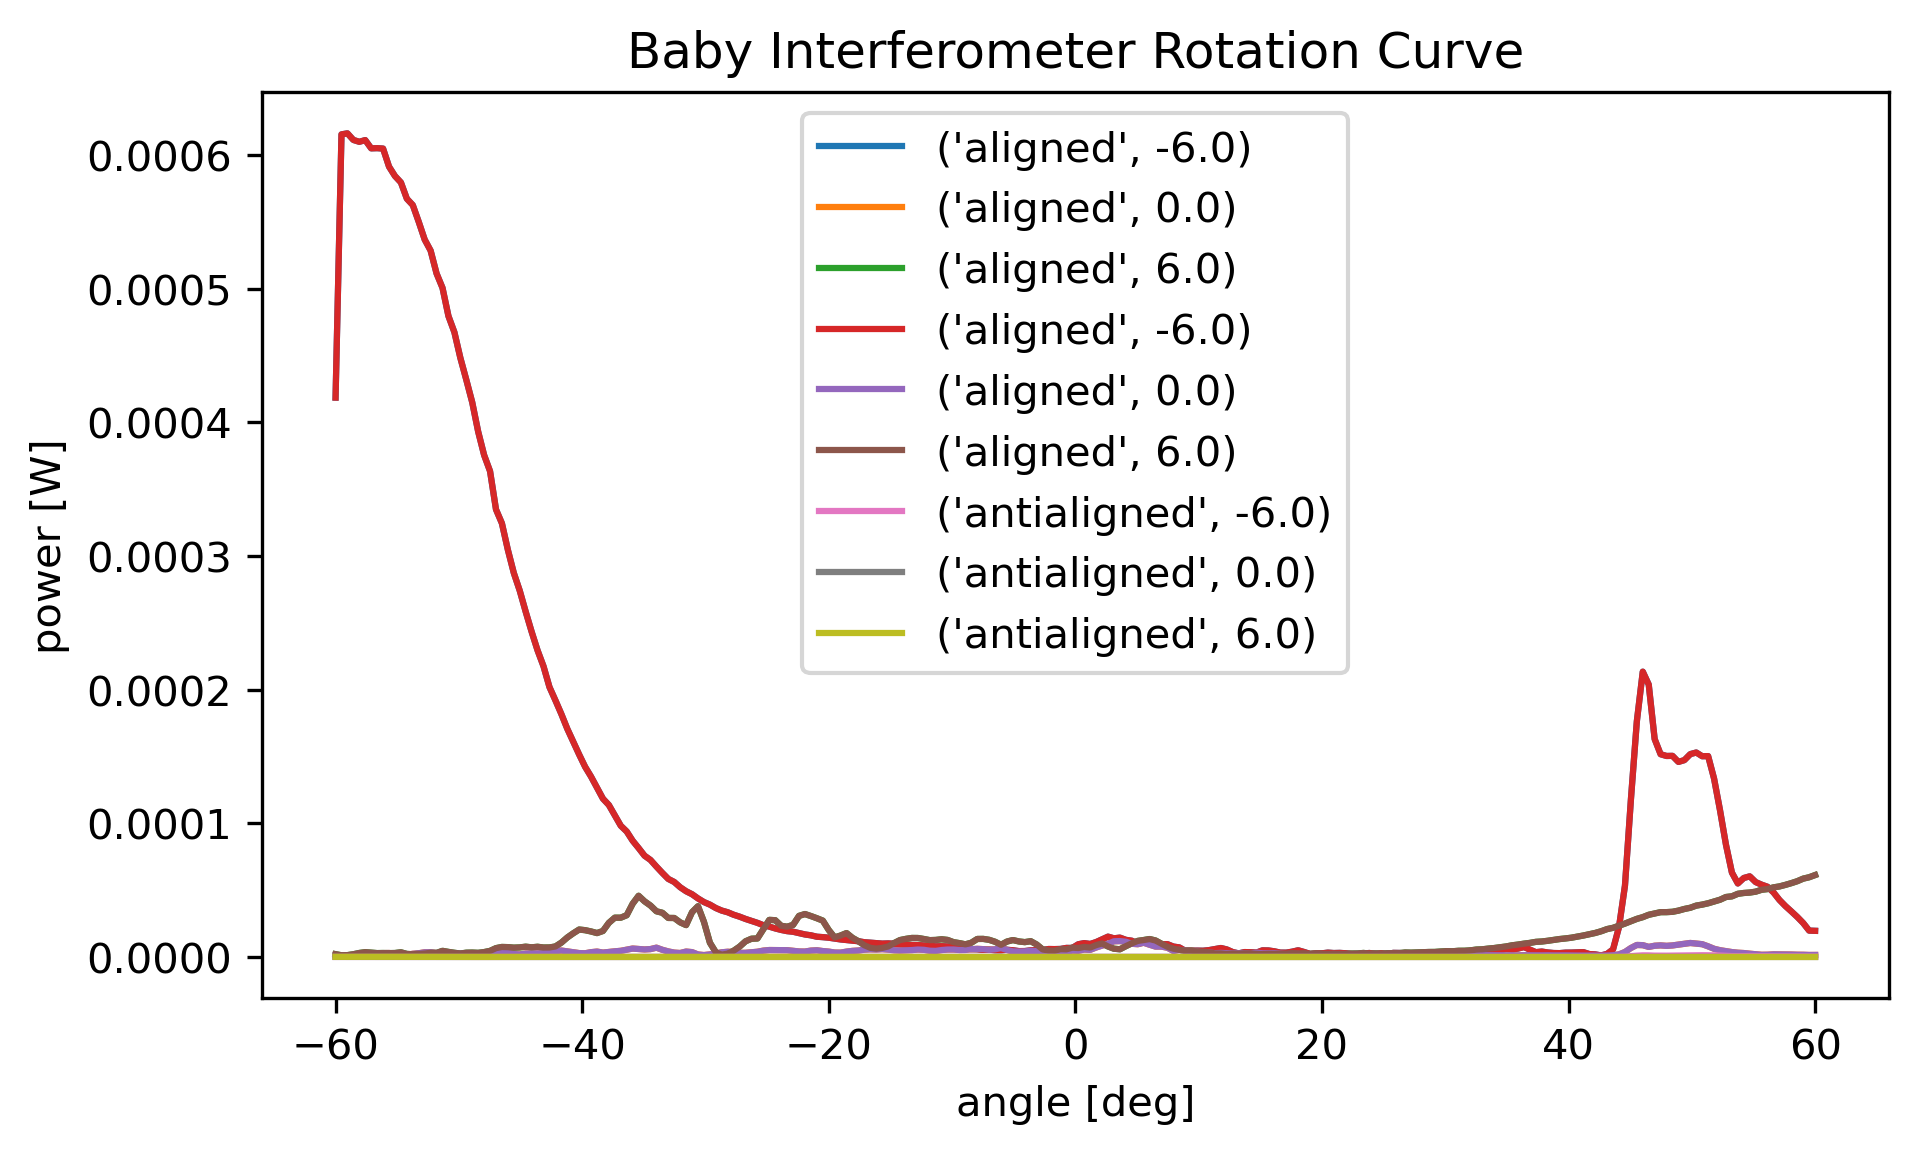

In [8]:
##############################
# Begin Plot - DO NOT MODIFY #
##############################

fig = plt.figure(figsize=figure_size, dpi=300)
ax = fig.add_subplot(111)

for key, val in power.items():
    angle, x_rot = key
    ax.plot(
        y_rot_values * 2e-3,
        val,
        label=(
            "aligned" if within_expected(angle, polarizer_angle, 10) else "antialigned",
            np.around(x_rot * 0.6e-3),
        ),
    )

ax.set_title("{} Rotation Curve".format(sample_name))
ax.set_xlabel("angle [deg]")
ax.set_ylabel("power [W]")
ax.legend(loc="best")

if save_figures:
    plt.savefig(
        "figures/{}/fresnal-curve/fresnal-curve-all.png".format(folder_name),
        facecolor="white",
    )

### Individual Plots Generator

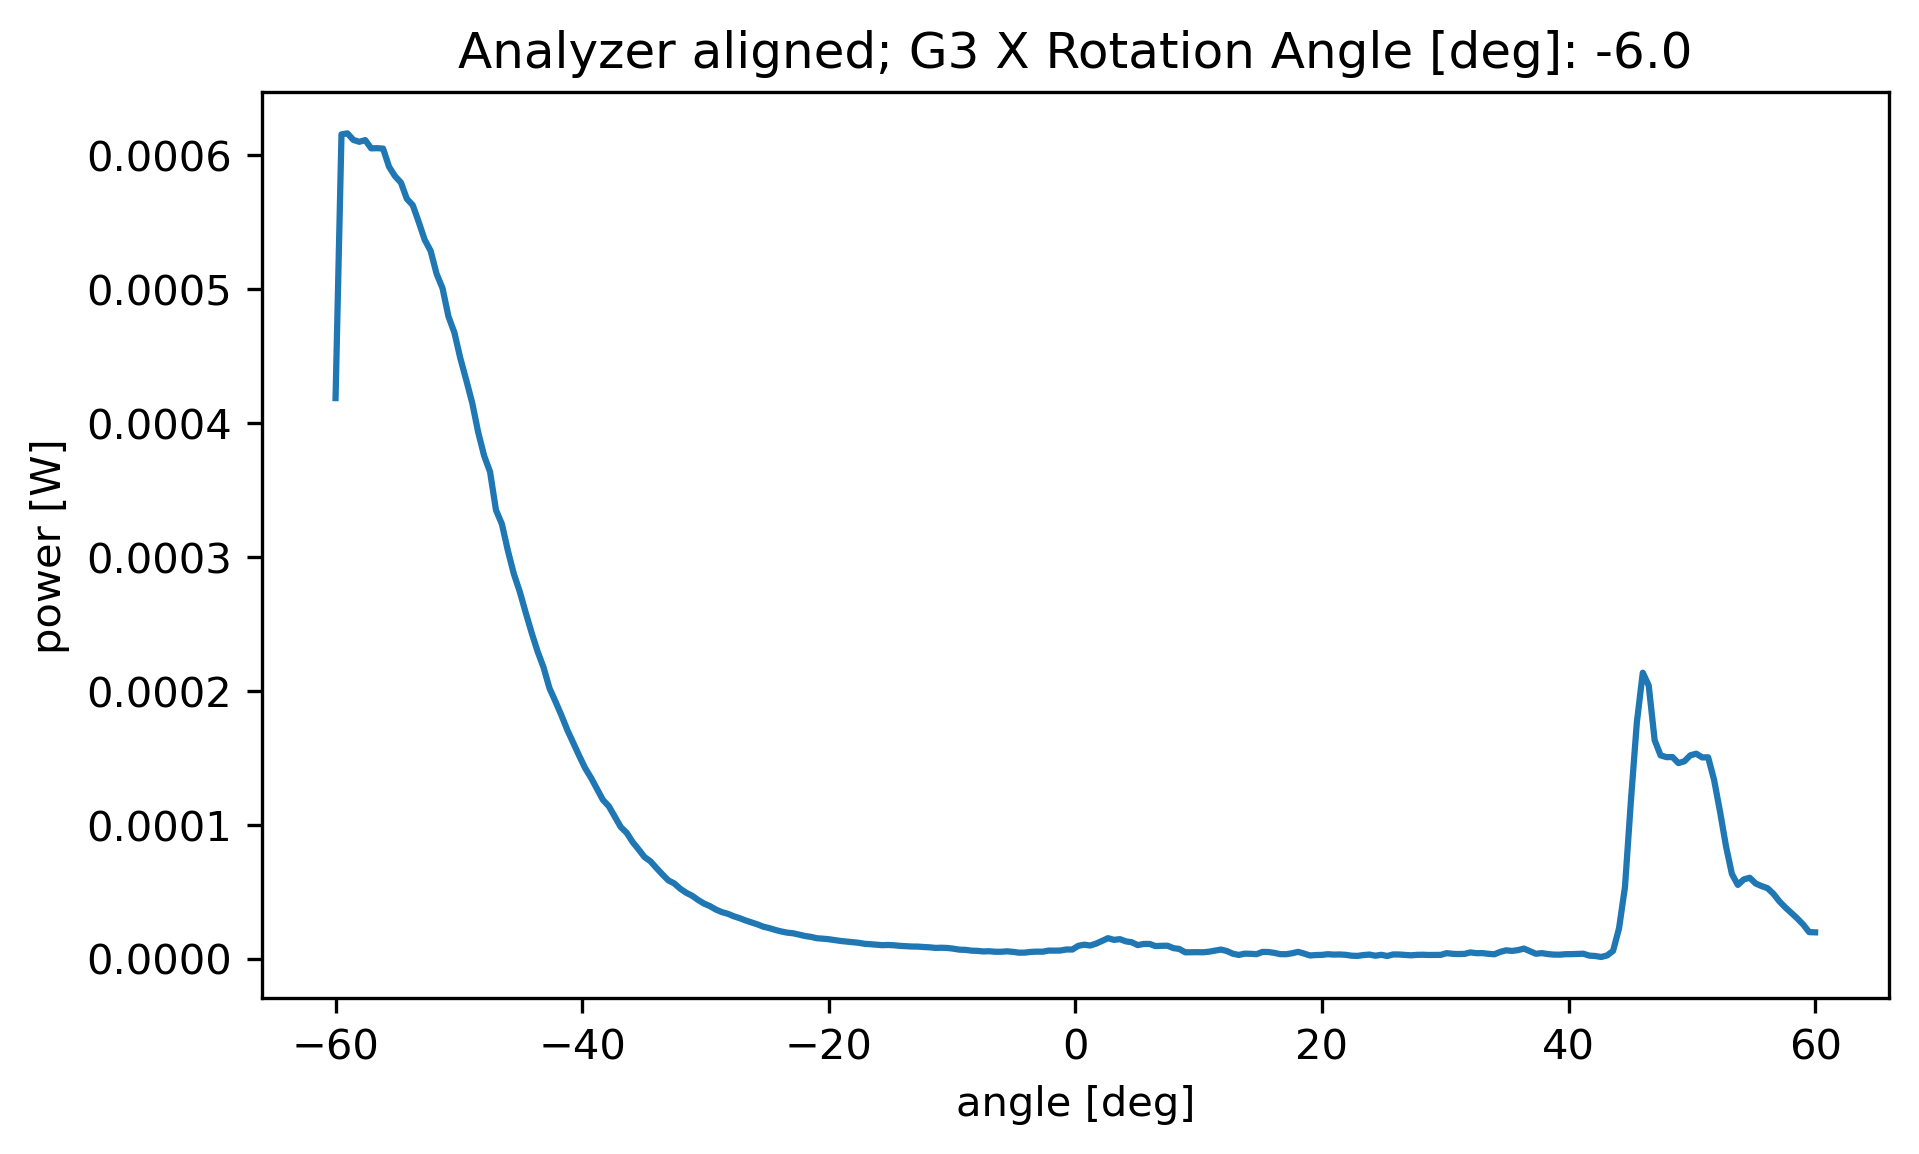

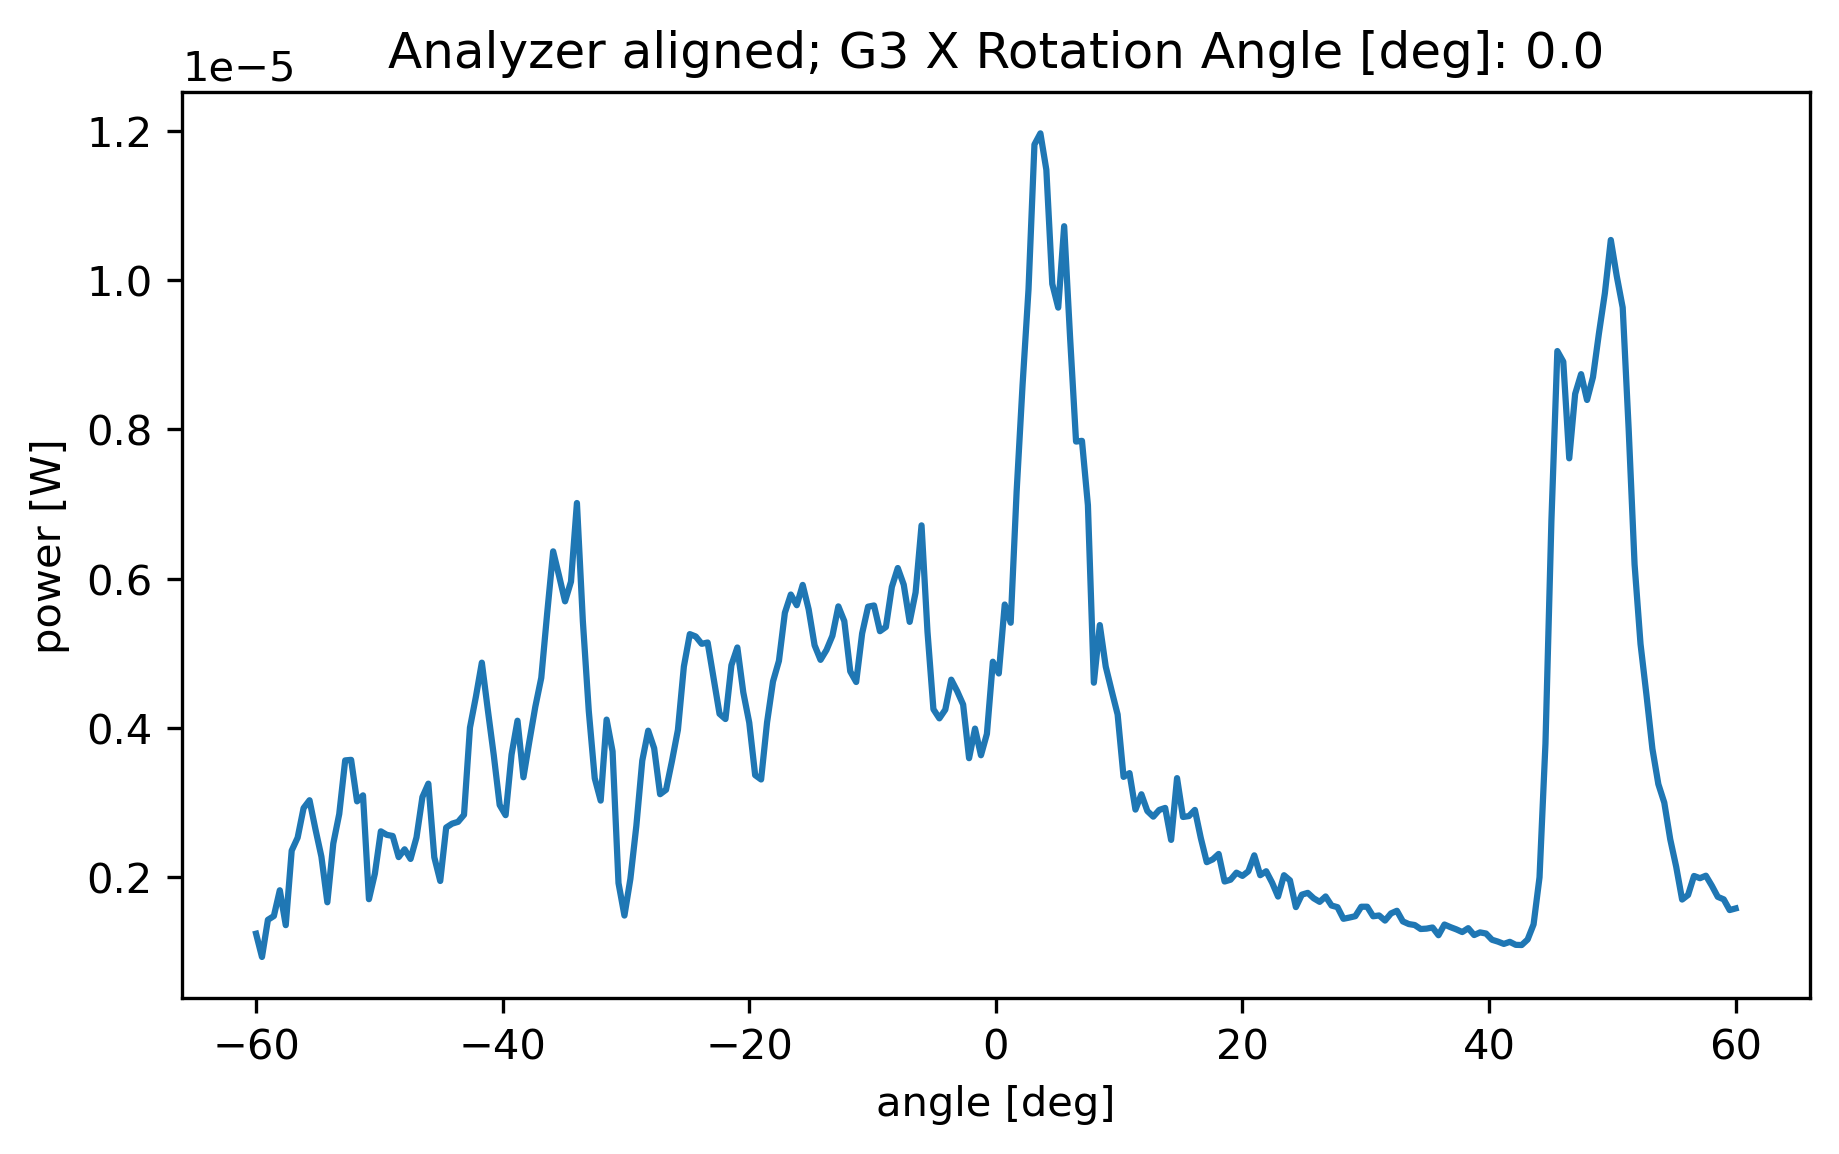

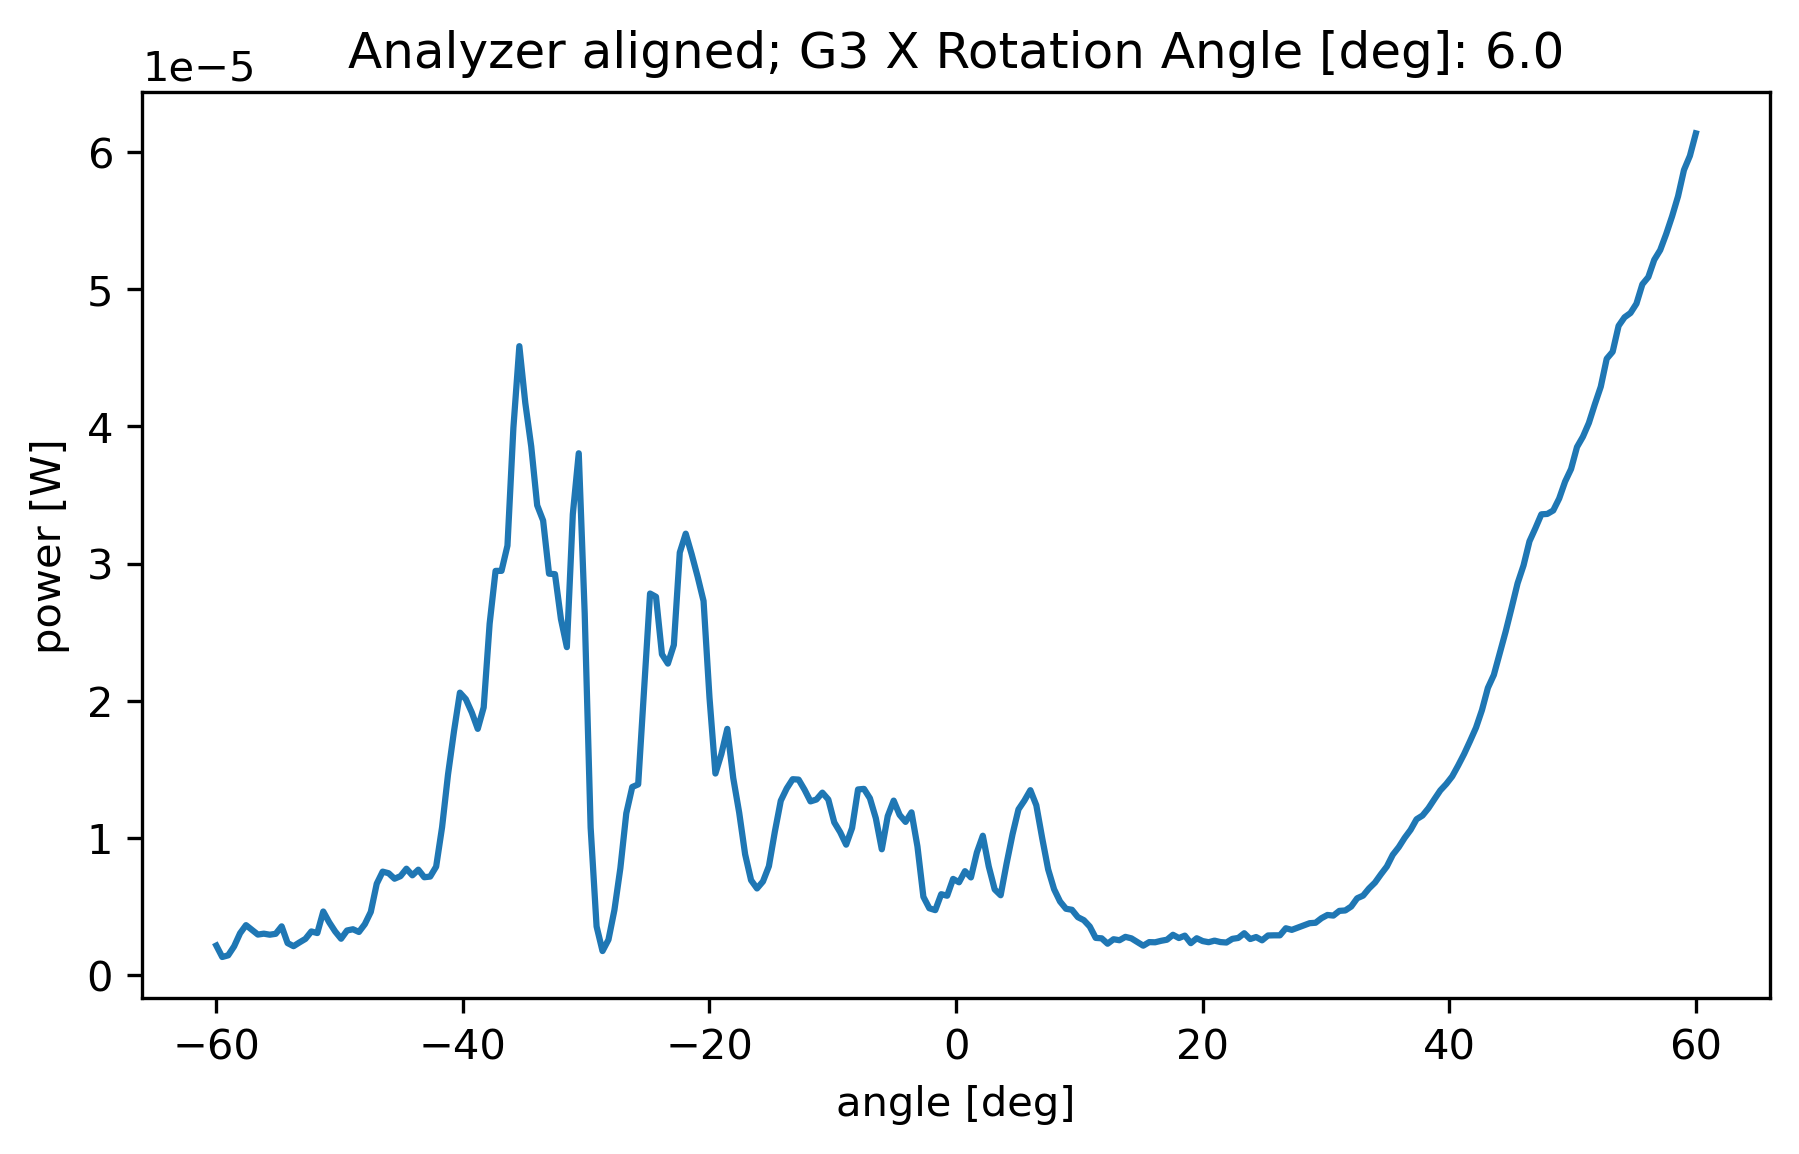

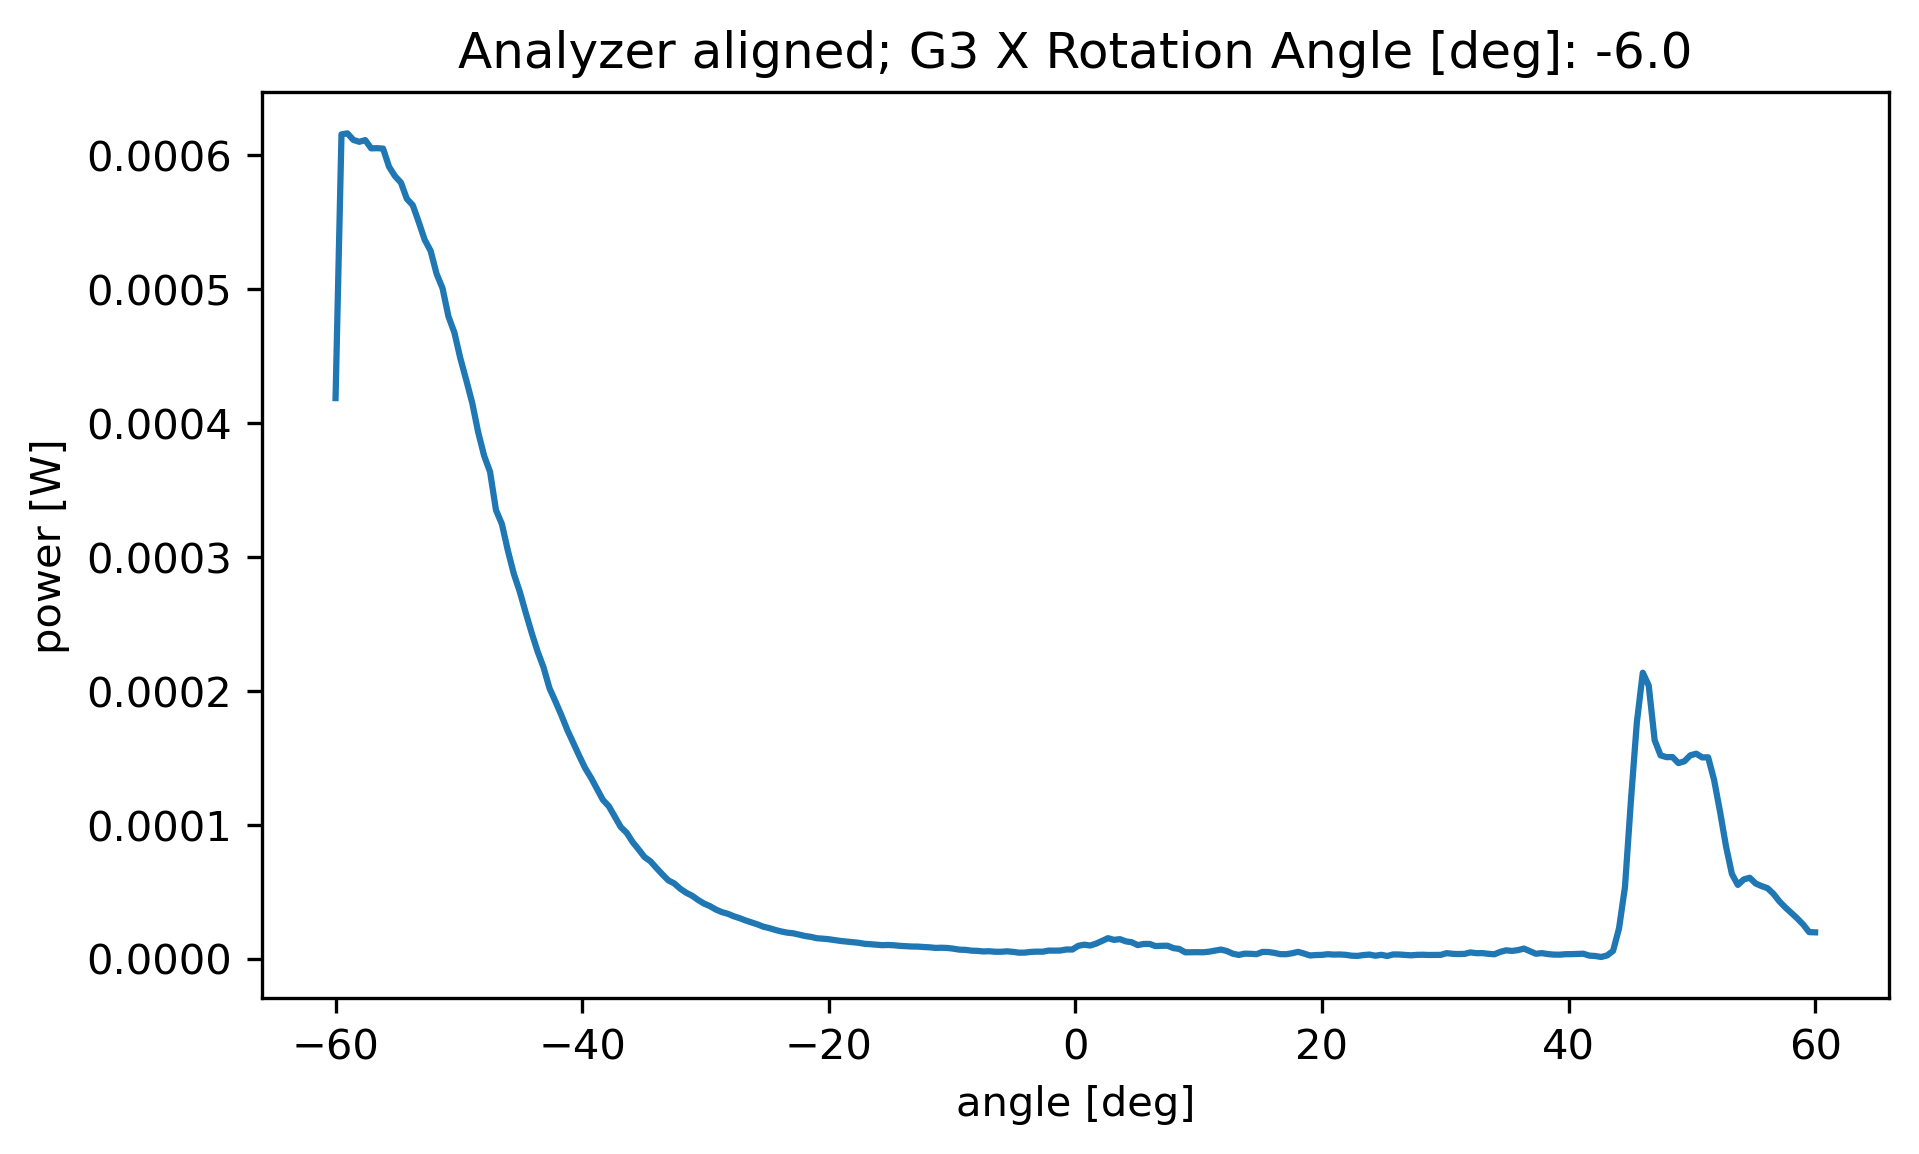

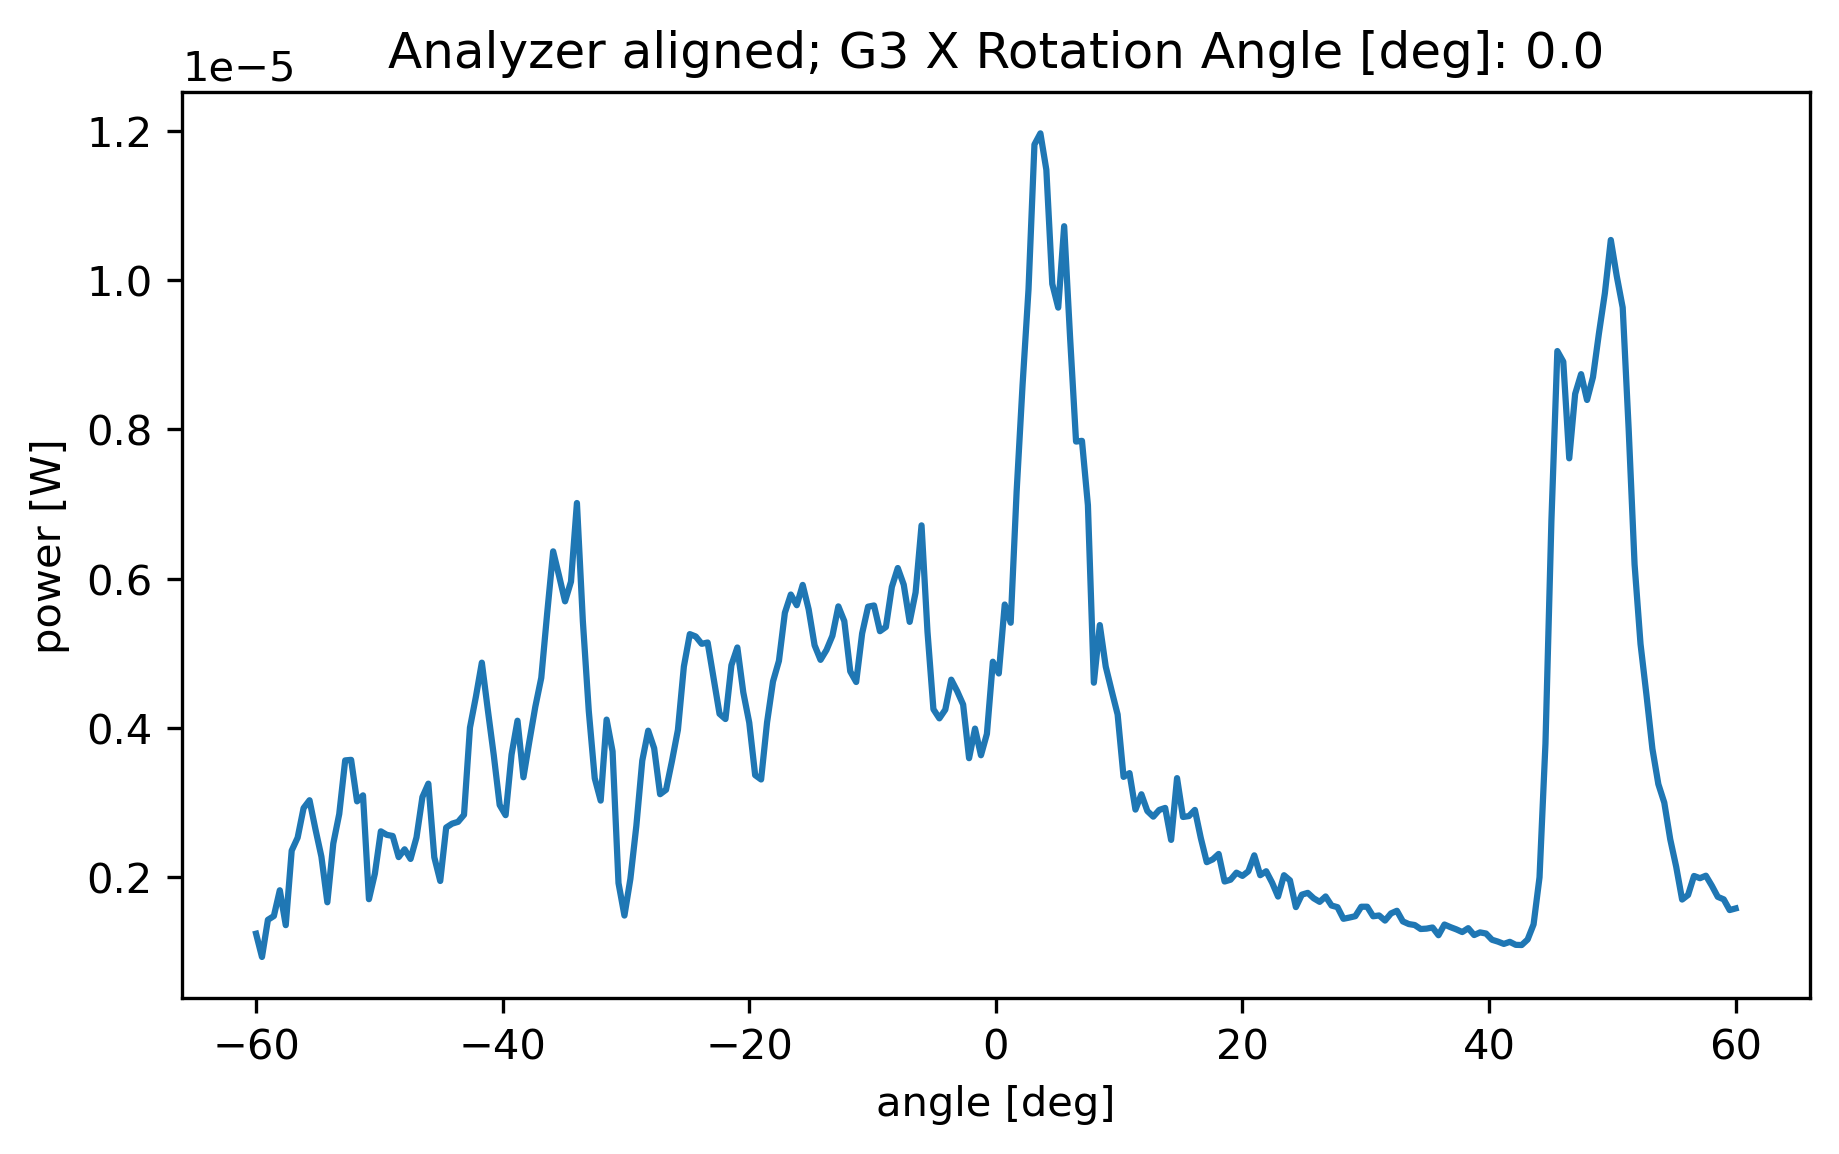

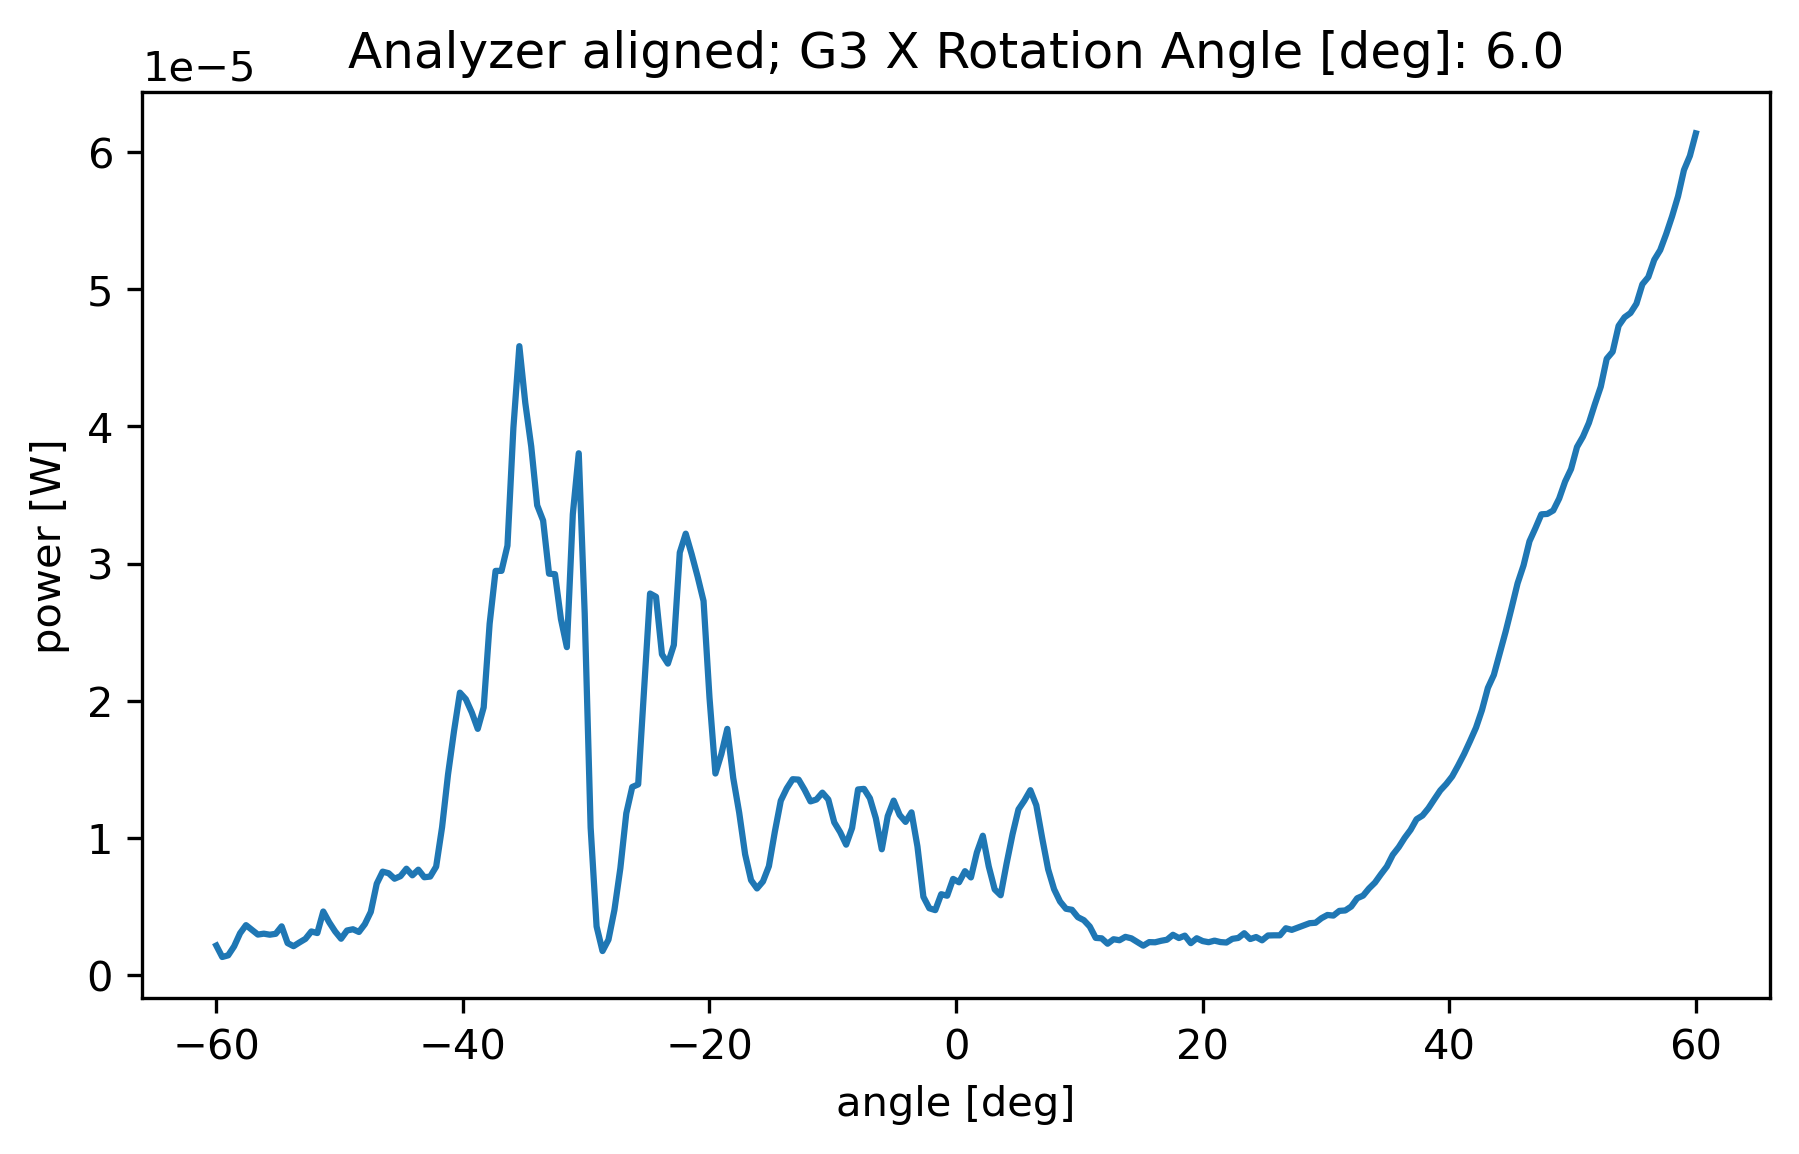

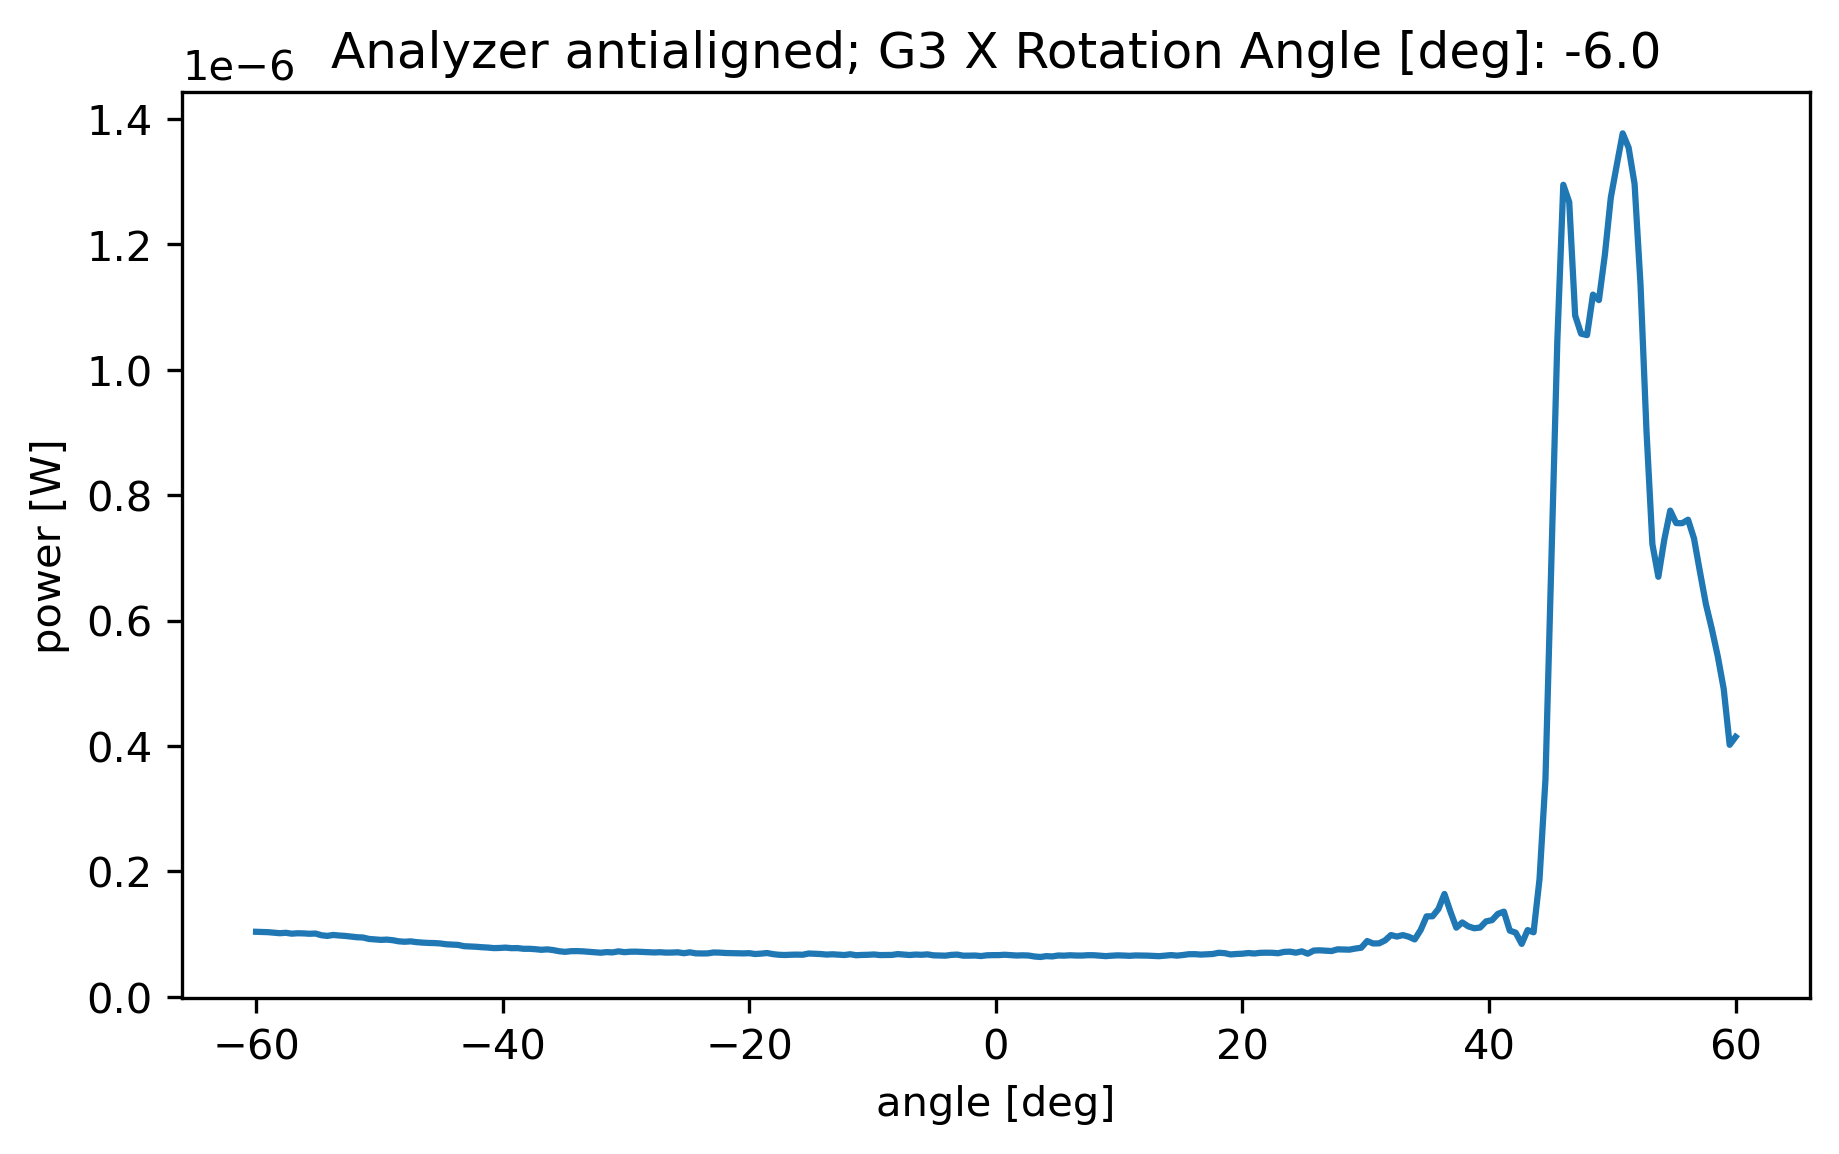

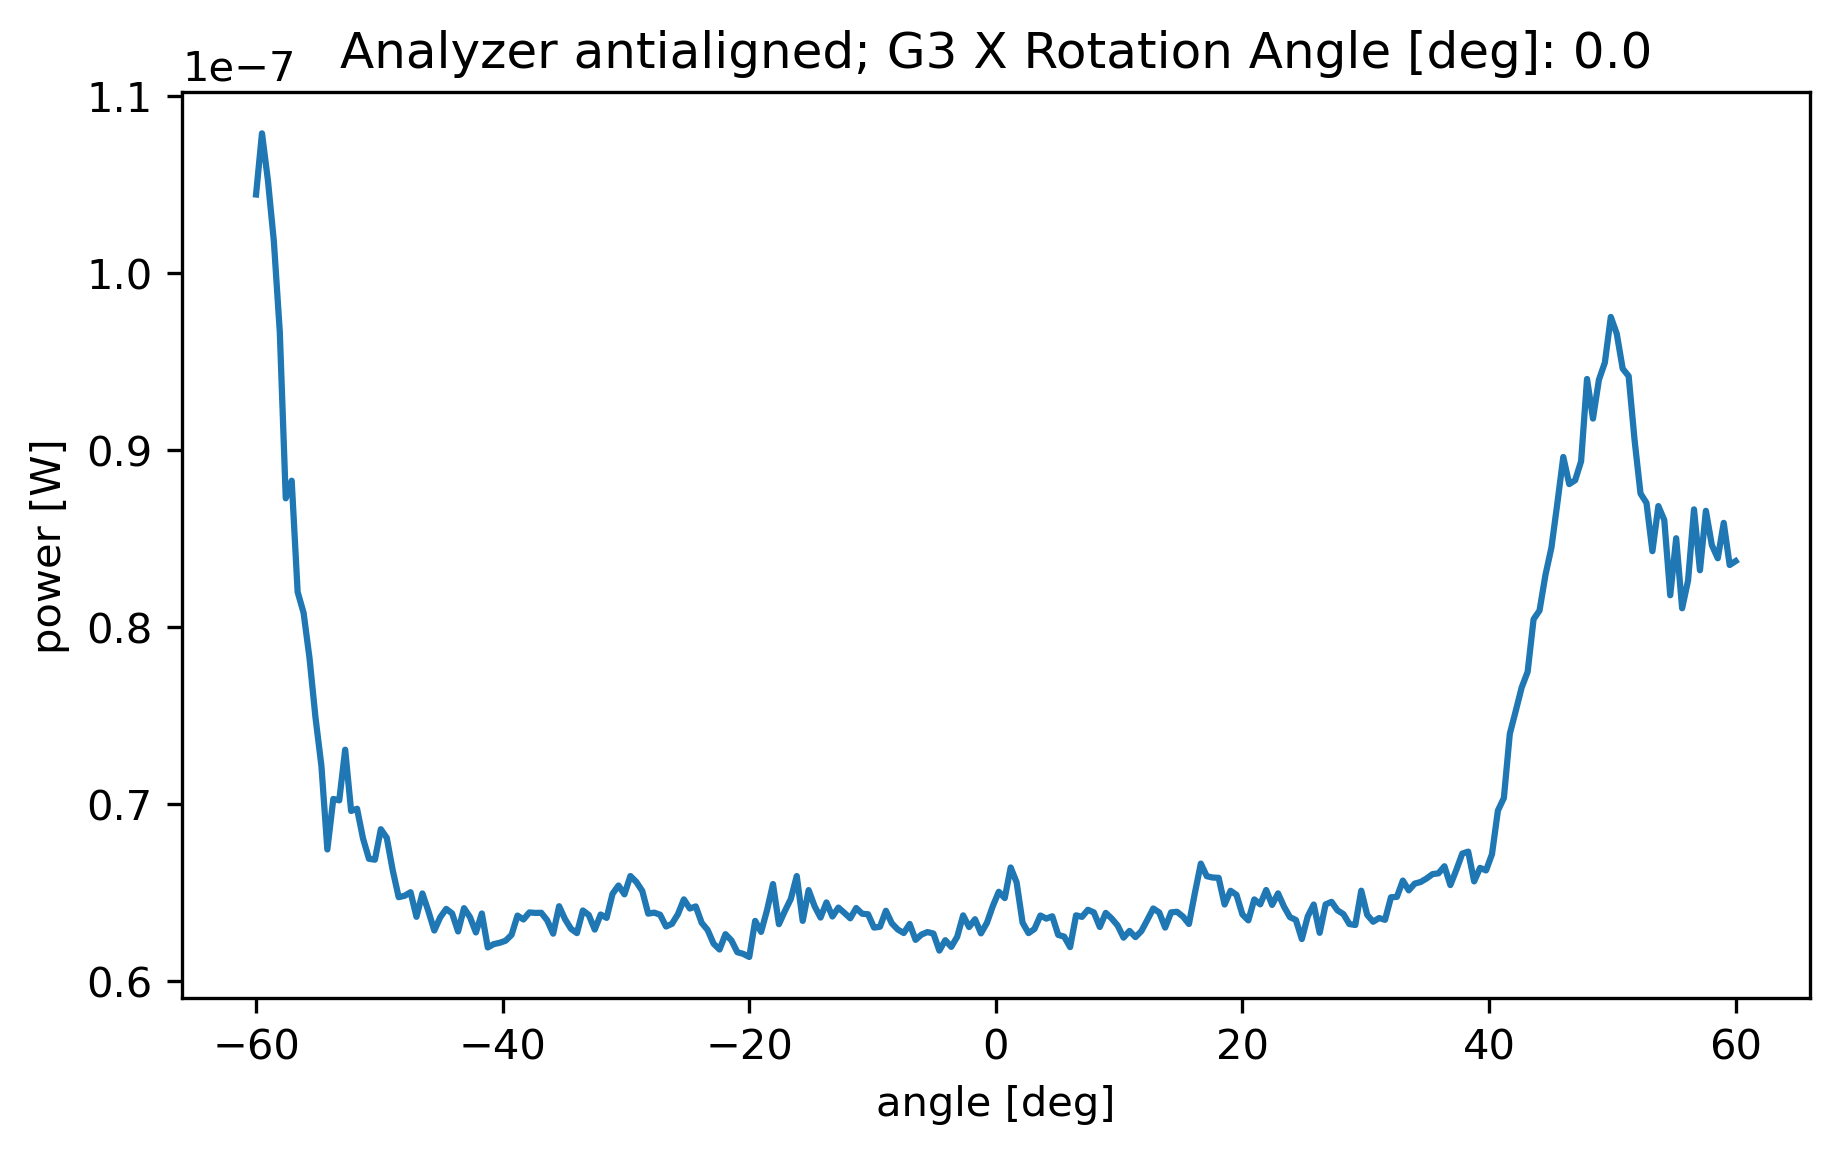

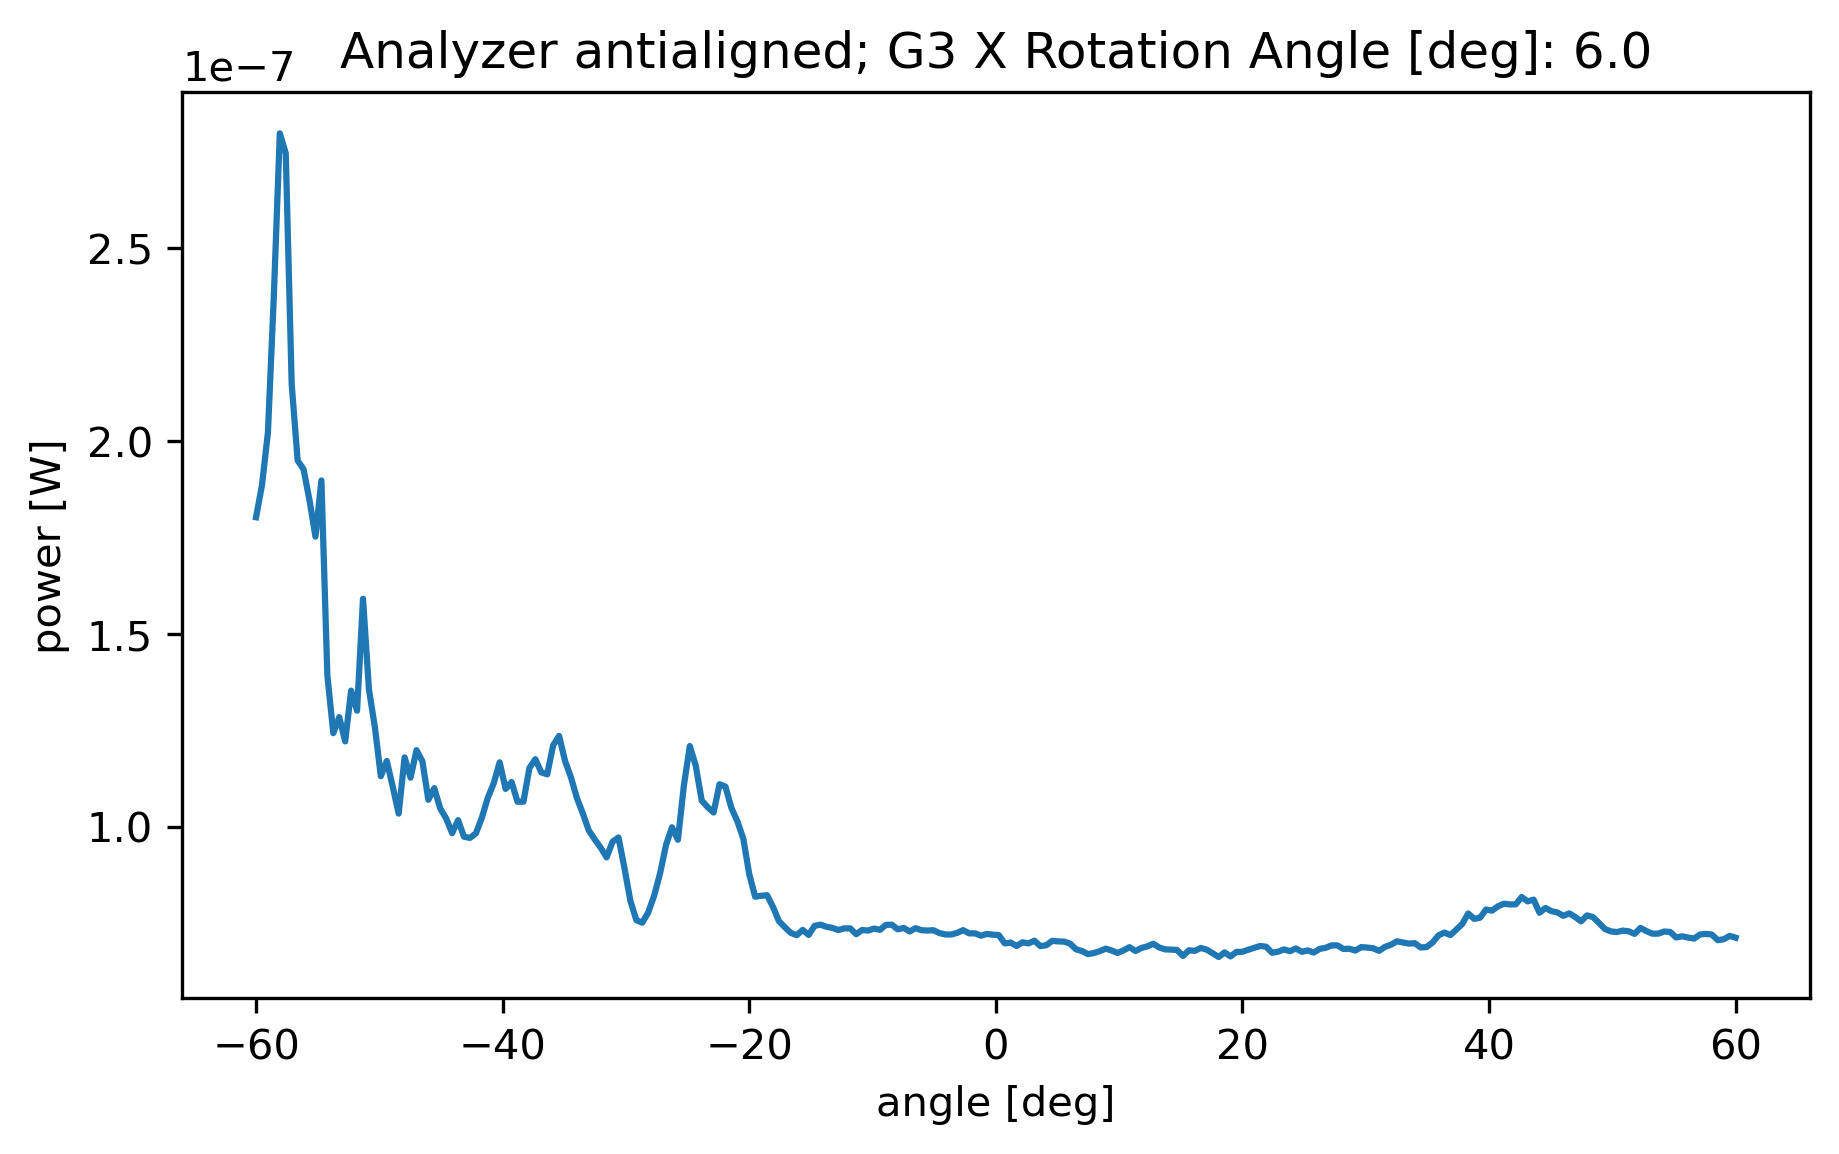

In [9]:
for key, val in power.items():
    fig = plt.figure(figsize=figure_size, dpi=300)
    angle, x_rot = key
    alignment = (
        "aligned" if within_expected(angle, polarizer_angle, 10) else "antialigned"
    )
    x_rot *= 0.6e-3
    x_rot = np.around(x_rot)

    plt.plot(y_rot_values * 2e-3, val)
    plt.title(
        "Analyzer {}; G3 X Rotation Angle [deg]: {}".format(alignment, np.around(x_rot))
    )
    plt.xlabel("angle [deg]")
    plt.ylabel("power [W]")
    plt.show()

    if save_figures:
        fig.savefig(
            "figures/{}/fresnal-curve/fresnal-curve-{}-x-rot-{}.png".format(
                folder_name, alignment, x_rot
            ),
            facecolor="white",
        )

In [ ]:
scan_df[within_expected(scan_df[key], val)]

In [ ]:
for key, value in power.items():
    print(key)

In [ ]:
get_measurements(
    scan_df,
    "Power - Mean [W]",
    {
        "Polarizer [deg]": 0,
        "Analyzer [deg]": 353,
        "G3 Y Rotation": y_rot_values[0],
    },
)

In [ ]:
x_rot_values